In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# Load the dataset
data = pd.read_csv('../Data/weatherAUS.csv')

In [4]:
# Drop rows with missing values in the target variable
data = data.dropna(subset=['RainTomorrow'])

In [5]:
# Select relevant features and target variable
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
            'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
            'Temp9am', 'Temp3pm', 'RainToday']

target = 'RainTomorrow'

In [6]:
X = data[features]
y = data[target]

In [7]:
# Encode categorical variable 'RainToday' (Yes/No) to binary (0/1)
encoder = LabelEncoder()
X['RainToday'] = encoder.fit_transform(X['RainToday'].astype(str))

In [8]:
# Handle missing values by filling with mean
X = X.fillna(X.mean())

In [9]:
# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

In [12]:
# Train the SVM classifier on the scaled training data
svm_classifier.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [13]:
# Predict the labels for test set
y_pred = svm_classifier.predict(X_test_scaled)

In [14]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.85


In [15]:
# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.96      0.91     22098
         Yes       0.76      0.47      0.58      6341

    accuracy                           0.85     28439
   macro avg       0.81      0.71      0.74     28439
weighted avg       0.84      0.85      0.84     28439



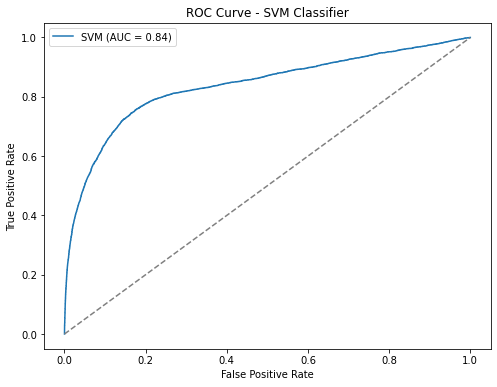

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Encode categorical target variable 'RainTomorrow' to binary (0 = 'No', 1 = 'Yes')
y_test_binary = np.where(y_test == 'Yes', 1, 0)

# Compute predicted probabilities for the positive class (Rain = Yes)
y_probs = svm_classifier.decision_function(X_test_scaled)

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test_binary, y_probs)
auc_score = roc_auc_score(y_test_binary, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'SVM (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM Classifier')
plt.legend()
plt.show()

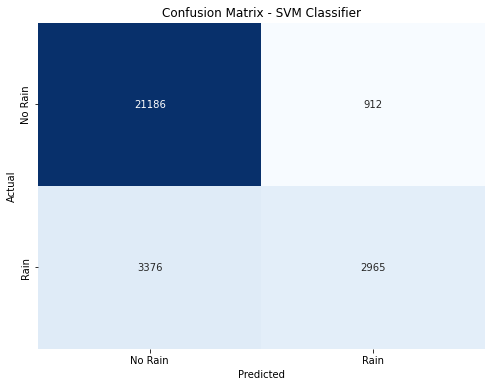

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot heatmap of confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM Classifier')
plt.show()